# Data Loading

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/Harsh Shetye/Downloads/Iris.csv')
df.drop('Id',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Train - Test Split

In [5]:
from sklearn.model_selection import train_test_split
X=df.drop("Species",axis=1)
y=df['Species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_train.shape

(105, 4)

## Decision Tree without Feature Selection

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statistics import mean

Accuracy_list=[]
for i in range(0,5):
  classifier = DecisionTreeClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  Accuracy_list.append(accuracy_score(y_test, y_pred))
print("Accuracy:",Accuracy_list)
print("Average Accuracy", mean(Accuracy_list))

Accuracy: [0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
Average Accuracy 0.9333333333333333


## Random Forest without Feature Selection

In [8]:
from sklearn.ensemble import RandomForestClassifier

Accuracy_list=[]
for i in range(0,5):
  clf=RandomForestClassifier(n_estimators=100)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  Accuracy_list.append(accuracy_score(y_test, y_pred))
print("Accuracy:",Accuracy_list) 
print("Average Accuracy", mean(Accuracy_list)) 

Accuracy: [0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]
Average Accuracy 0.9511111111111111


## Feature Selection

In [9]:
feature_imp = pd.Series(clf.feature_importances_,index=df.columns[0:-1]).sort_values(ascending=False)
feature_imp

PetalWidthCm     0.451881
PetalLengthCm    0.423523
SepalLengthCm    0.093009
SepalWidthCm     0.031587
dtype: float64

In [10]:
X=df[['PetalLengthCm','PetalWidthCm']]
y=df['Species']                                       

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [13]:
X_train.shape

(105, 2)

## Decision Tree after Feature Selection

In [11]:
Accuracy_list=[]
for i in range(0,5):
  classifier = DecisionTreeClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  Accuracy_list.append(accuracy_score(y_test, y_pred))
print("Accuracy:",Accuracy_list)
print("Average Accuracy", mean(Accuracy_list))

Accuracy: [0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
Average Accuracy 0.9777777777777777


## Random Forest after Feature Selection 

In [12]:
for i in range(0,5):
  clf=RandomForestClassifier(n_estimators=100)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  Accuracy_list.append(accuracy_score(y_test, y_pred))
print("Accuracy:",Accuracy_list)
print("Average Accuracy", mean(Accuracy_list))

Accuracy: [0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
Average Accuracy 0.9777777777777777


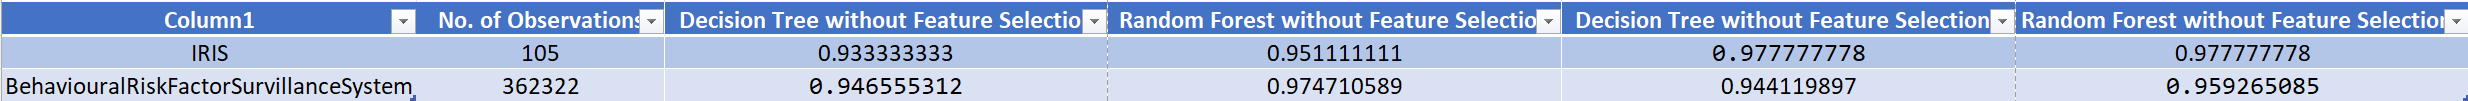